# Исследование надежности заемщиков

**Описание проектной работы**

Кредитным отделом банка предоставлены данные - статистика о платёжеспособности клиентов. Исследование необходимо для построения модели кредитного скоринга.


**Цель проекта**

Проанализировать влияние семейного положения клиента на факт погашения кредита в срок. Необходимо ответить на следующие вопросы:

   - есть ли зависимость между количеством детей и возвратом кредита в срок?
   - есть ли зависимость между семейным положением и возвратом кредита в срок?
   - есть ли зависимость между уровнем дохода и возвратом кредита в срок?
   - как разные цели кредита влияют на его возврат в срок?

# Содержание

[1. Изучение исходных данных](#Изучение-исходных-данных)
      
[2. Предобработка данных](#Предобработка-данных)

[3.  Анализ данных и ответы на вопросы](#Анализ-данных-и-ответы-на-вопросы)

[4.  Общий вывод](#Общий-вывод)

## Изучение исходных данных

[Назад к содержанию](#Содержание)

In [47]:
# импорт библиотек и чтение данных

import pandas as pd
import seaborn as sns

data = pd.read_csv('/datasets/data.csv')

In [2]:
# вывод первых 20 строк

data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Проанализируем полученный датафрейм:

   - присутствуют числовые и категориальные признаки;
   - значения признака `education` записаны по-разному: заглавными или строчными буквами.
   
Выведем уникальные значения признака `education`.

In [3]:
# уникальные значения признака education:

data.education.unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [4]:
# приведем значения признака education к нижнему регистру:

data.education = data.education.str.lower()

In [5]:
# проверка:

data.education.unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Аналогичным образом проверим все оставшиеся категориальные признаки.

In [6]:
# уникальные значения признака family_status:

data.family_status.unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Тут всё ок.

In [7]:
# уникальные значения признака gender:

data.gender.unique()

array(['F', 'M', 'XNA'], dtype=object)

In [8]:
# выведем строки со значением признака gender равным XNA:

data.query('gender == "XNA"')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Всего одна запись. Удалим из датафрейма.

In [9]:
# удаление пола XNA:

data = data.query('gender != "XNA"')

# проверка:
data.gender.unique()

array(['F', 'M'], dtype=object)

Далее перейдём к признаку `income_type`.

In [10]:
data.income_type.unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Всё хорошо. Перейдём к последнему категориальному признаку `purpose`.

In [11]:
data.purpose.unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Тут видны синтаксические ошибки. А также одни и те же цели, записанные по-разному. Оставим эти признаки пока как есть без изменений. 

In [12]:
# вывод основной информации

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


## Предобработка данных

[Назад к содержанию](#Содержание)

### Удаление пропусков

In [13]:
# количество пропусков

data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Наблюдаем пропуски в двух столбцах: `days_employed` и `total_income`.

Обработаем сначала `total_income` - данный столбец хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` заполним медианным доходом среди всех записей с тем же типом.

In [14]:
# заполнение пропусков в total_income
# медианным значением total_income 
# по каждому типу из столбца income_type

for row in data['income_type'].unique():
    data.loc[(data['income_type'] == row) \
        & (data['total_income'].isna()), \
        'total_income'] = \
    data.loc[(data['income_type'] == row), \
        'total_income'].median()


Перейдём к признаку трудовой стаж - `days_employed`. Трудовой стаж зависит от типа занятости. Выведем медианное значение трудового стажа для каждого типа занятости.

In [15]:
# медианное значение трудового стажа для каждого типа занятости:

data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете           -3296.759962
госслужащий         -2689.368353
компаньон           -1546.333214
пенсионер          365213.306266
предприниматель      -520.848083
сотрудник           -1574.202821
студент              -578.751554
Name: days_employed, dtype: float64

Наблюдаем отрицательные значения, а также аномально большие значения для безработных и пенсионеров. Заполним пропуски в `days_employed` медианным значением по типу занятости.

In [16]:
# заполнение пропусков в трудовом стаже
# медианным значением по типу занятости:

for row in data['income_type']:
    data.loc[(data['income_type'] == row) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == row), 'days_employed'].median()
    

In [17]:
# проверка на пропуски

data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Избавились от пропусков.

### Обработка аномальных значений

In [18]:
# вывод общей информации:

data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21524.000000,21524.000000,21524.000000,21524.000000,21524.000000,21524.000000,2.152400e+04
mean,0.538933,63553.583950,43.294276,0.817181,0.972542,0.080886,1.652226e+05
std,1.381615,141152.972692,12.574188,0.548092,1.420357,0.272667,9.804552e+04
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2570.051846,33.000000,1.000000,0.000000,0.000000,1.077960e+05
50%,0.000000,-1355.580204,42.000000,1.000000,0.000000,0.000000,1.425944e+05
75%,1.000000,-316.195939,53.000000,1.000000,1.000000,0.000000,1.955452e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Отметим следующие аномалии:

   - минимальное количество детей равно -1;
   - максимальное количество детей равно 20;
   - отрицательное количество дней трудового стажа в столбце `days_employed`

In [19]:
# вывод строк с количеством детей равным -1:

data.query('children == -1')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
705,-1,-902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
742,-1,-3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
800,-1,349987.852217,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
941,-1,365213.306266,57,среднее,1,женат / замужем,0,F,пенсионер,0,118514.486412,на покупку своего автомобиля
1363,-1,-1195.264956,55,среднее,1,женат / замужем,0,F,компаньон,0,69550.699692,профильное образование
1929,-1,-1461.303336,38,среднее,1,Не женат / не замужем,4,M,сотрудник,0,109121.569013,покупка жилья
2073,-1,-2539.761232,42,среднее,1,в разводе,3,F,компаньон,0,162638.609373,покупка жилья
3814,-1,-3045.290443,26,среднее,1,гражданский брак,1,F,госслужащий,0,131892.785435,на проведение свадьбы
4201,-1,-901.101738,41,среднее,1,женат / замужем,0,F,госслужащий,0,226375.766751,операции со своей недвижимостью


In [20]:
# кол-во строк с количеством детей равным -1:

data.query('children == -1')['children'].count()

47

Всего 47 записей. Удалим все записи с количеством детей равным -1.

In [21]:
data = data.query('children != -1')

Выведем строки с количеством детей равным 20:

In [22]:
# вывод строк с количеством детей равным 20:

data.query('children == 20')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,-855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,-3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,-2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2941,20,-2161.591519,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
...,...,...,...,...,...,...,...,...,...,...,...,...
21008,20,-1240.257910,40,среднее,1,женат / замужем,0,F,сотрудник,1,133524.010303,свой автомобиль
21325,20,-601.174883,37,среднее,1,женат / замужем,0,F,компаньон,0,102986.065978,профильное образование
21390,20,-1546.333214,53,среднее,1,женат / замужем,0,M,компаньон,0,172319.266339,покупка жилой недвижимости
21404,20,-494.788448,52,среднее,1,женат / замужем,0,M,компаньон,0,156629.683642,операции со своей недвижимостью


In [23]:
# кол-во строк с количеством детей равным 20:

data.query('children == 20')['children'].count()

76

Данных совсем немного, поэтому избавимся от них:

In [24]:
data = data.query('children != 20')

In [25]:
# проверка

data.query('children == -1 | children == 20')['children'].count()

0

In [26]:
# уникальные значения в столбце children:

data.children.unique()

array([1, 0, 3, 2, 4, 5])

Избавились от аномалий в столбце с количеством детей. Далее перейдём к столбцу с количеством дней трудового стажа `days_employed`.

In [27]:
# строки с отрицательным количеством дней трудового стажа:

data.query('days_employed < 0')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [28]:
# кол-во строк с отрицательным трудовым стажем:

data.query('days_employed < 0')['days_employed'].count()

17560

Данных много, не можем от них избавиться. Предположим, что данные по ошибке были введены со знаком "минус", поэтому избавимся от отрицательных значений.

In [29]:
# избавимся от отрицательных значений в столбце days_employed:

data['days_employed'] = data['days_employed'].abs()

In [30]:
# проверка:

data.query('days_employed < 0')['days_employed'].count()

0

Избавились от отрицательных значений в трудовом стаже. Выведем общую информацию.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21401 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21401 non-null  int64  
 1   days_employed     21401 non-null  float64
 2   dob_years         21401 non-null  int64  
 3   education         21401 non-null  object 
 4   education_id      21401 non-null  int64  
 5   family_status     21401 non-null  object 
 6   family_status_id  21401 non-null  int64  
 7   gender            21401 non-null  object 
 8   income_type       21401 non-null  object 
 9   debt              21401 non-null  int64  
 10  total_income      21401 non-null  float64
 11  purpose           21401 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


Можно отметить, что признак с общим доходом `total_income` имеет вещественный тип данных. Выведем несколько первых строк.

In [32]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Далее избавимся от значений в `total_income` после запятой.

### Изменение типов данных

In [33]:
# изменение вещественного типа данных на целочисленный:

data['total_income'] = data['total_income'].astype('int')

In [34]:
# проверка:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21401 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21401 non-null  int64  
 1   days_employed     21401 non-null  float64
 2   dob_years         21401 non-null  int64  
 3   education         21401 non-null  object 
 4   education_id      21401 non-null  int64  
 5   family_status     21401 non-null  object 
 6   family_status_id  21401 non-null  int64  
 7   gender            21401 non-null  object 
 8   income_type       21401 non-null  object 
 9   debt              21401 non-null  int64  
 10  total_income      21401 non-null  int64  
 11  purpose           21401 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


Привели значения признака `total_income` к целочисленному виду. Остальные признаки не требуют изменения типов данных и готовы для дальнейшего использования.

### Обработка дубликатов

In [35]:
# проверим датасет на явные дубликаты:

data.duplicated().sum()

71

In [36]:
# вывод нескольких строк-дубликатов:

data[data.duplicated()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,1574.202821,41,среднее,1,женат / замужем,0,F,сотрудник,0,142594,покупка жилья для семьи
3290,0,365213.306266,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу
4182,1,1574.202821,34,высшее,0,гражданский брак,1,F,сотрудник,0,142594,свадьба
4851,0,365213.306266,60,среднее,1,гражданский брак,1,F,пенсионер,0,118514,свадьба
5557,0,365213.306266,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу


In [37]:
# удалим все явные дубликаты:

data = data.drop_duplicates()

# проверка:
data.duplicated().sum()

0

Избавились от явных дубликатов.

### Категоризация данных

Создадим новый признак `total_income_category` и заполним его на основании диапазонов, указанных ниже

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

Для этого создадим новую функцию.

In [39]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [40]:
# создание нового признака total_income_category
# и его заполнение с помощью функции categorize_income

data['total_income_category'] = data['total_income'].apply(categorize_income)

In [41]:
# проверка

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Анализ признака `purpose`

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`

In [42]:
data.purpose.unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Встречаются одинаковые цели взятия кредита, записанные по-разному. Можно выделить следующие категории кредитов:
   - операции с автомобилем;
   - операции с недвижимостью;
   - проведение свадьбы;
   - получение образования.
   
Сделаем новый признак `purpose_category` и на основании данных из столбца `purpose` заполним его перечисленными выше категориями. Для этого создадим собственную функцию. 

In [43]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [44]:
# создание новго признака purpose_category
# и заполнение его с помощью функции categorize_purpose

data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [45]:
# проверка

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


## Анализ данных и ответы на вопросы

[Назад к содержанию](#Содержание)

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

Подсчитаем количество возвратов и невозвратов кредита в срок в зависимости от количества детей.

In [46]:
# сгруппируем данные по столбцу children и подсчитаем количество возвратов и 
# невозвратов кредита в срок по столбцу debt, применив метод value_counts()

print(data.groupby('children')['debt'].value_counts())

children  debt
0         0       13027
          1        1063
1         0        4364
          1         444
2         0        1858
          1         194
3         0         303
          1          27
4         0          37
          1           4
5         0           9
Name: debt, dtype: int64


Из таблицы видно, что, не смотря на количество детей, у всех были задолженности по возвратам, за исключением тех у кого 5 детей (таких людей всего 9). Для наглядности построим график зависимости от количества детей и задолженности по возвратам.

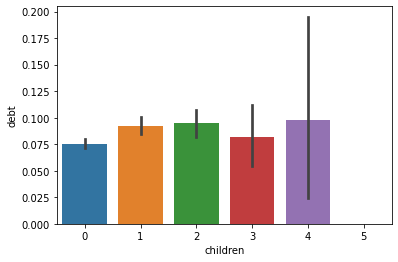

In [49]:
# построим график зависимости где по оси Х будет количество детей, 
# а по оси Y будет значения наличия задолженности

sns.barplot(x=data['children'], y=data['debt']);

График также показывает наличие задолженности по всем категориям, кроме тех у кого 5 детей. По графику видно, что меньше всего задолженности было у кого нет детей и у кого трое детей. Больше всего задолженностей у кого четверо детей. В целом распределение примерно одинаковое - все категории людей практически одинаково возвращают кредит в срок.

Для более точного понимания подсчитаем процент возврата кредита в срок в зависимости от количества детей. Для этого создадим функцию, на вход которой будем подавать количество детей, а на выходе получать процент возврата кредита в срок. Подсчет сделаем для всех категорий людей, за исключением тех у кого пятеро детей, т.к. у них проблем с выплатами отсутствуют.

In [50]:
# создадим универсальную функцию debt, которая будет принимать на входе два параметра:
# 1) столбец, по которому идет анализ, например children,
# 2) значение, например, количество детей,
# на выходе функция будет возвращать процент возврата кредита в срок. 
# данная функция также пригодится для последующего анализа.

def debt(row, value):
    # подсчитаем количество возвращенных кредитов в срок:
    without_debt = data.loc[(data[row] == value) & (data['debt'] == 0)]['debt'].count()
    
    # подсчитаем количество кредитов, выплаченных с задержкой:
    with_debt = data.loc[(data[row] == value) & (data['debt'] == 1)]['debt'].count()
    
    # подсчитаем процент возврата кредита в срок
    percent = 1 - with_debt / without_debt
    
    # выведем процент возврата кредита в срок
    return f'{percent:.2%}'

In [51]:
# выведем процент возврата кредита в срок для тех у кого нет детей
# и для тех у кого до четырех детей включительно:

for i in range(5):
    print(f"Процент возврата кредита в срок у кого {i} детей/ребенок {debt('children', i)}")

Процент возврата кредита в срок у кого 0 детей/ребенок 91.84%
Процент возврата кредита в срок у кого 1 детей/ребенок 89.83%
Процент возврата кредита в срок у кого 2 детей/ребенок 89.56%
Процент возврата кредита в срок у кого 3 детей/ребенок 91.09%
Процент возврата кредита в срок у кого 4 детей/ребенок 89.19%


Далее найдём общее количество клиентов, количество просрочек по платежам и долю просрочек. Данные сведём в таблицу, сгруппировав по количеству детей. 

In [52]:
# создадим функцию, которая будет возвращать долю возврата кредита с просрочкой в процентах
# для этого разделим кол-во возвратов с задержкой на общее количество взятых кредитов
# кол-во возвратов с задержкой - это сумма единиц в столбце 'debt', 
    # т.к. 1 - это задержка, а 0 - возврат вовремя 
# общее количество взятых кредитов - это кол-во значений в столбце 'debt' (также это равно общему кол-ву клиентов)

def percentage(debt):
    return str(round((debt.sum() / debt.count()) * 100, 2)) + '%' # вывод округляем до 2 знаков после запятой и добавляем знак '%'


In [53]:
# создадим еще одну функцию, которая будет возвращать количество вовремя возвращенных кредитов

def debt_free_qnt(debt):
    return debt.count() - debt.sum()

In [54]:
# для формирования сводной таблицы, в которой будет отражено общее кол-во клиентов, кол-во просрочек и 
# доля возврата кредита в срок, сгруппированной по количеству детей, воспользуемся методом pivot_table
# в качестве 'index' передадим столбец 'children' - по нему будет идти группировка данных
# в качестве 'values' передаем столбец 'debt' - по нему будут идти подсчеты данных
# в 'aggfunc' передаем функции:
    # 'count' - для подсчета общего кол-ва значений в столбце 'debt'
    # собственную функцию debt_free_qnt для вывода количества кредитов, выплаченных в срок
    # 'sum' - для суммирования данных в столбце 'debt'
    # собственную функцию percentage, для вывода доли возврата кредита с задержкой
    
data_pivot_by_children = pd.pivot_table( \
        data, index='children', values=['debt'], aggfunc=['count', debt_free_qnt, 'sum', percentage])
data_pivot_by_children

,count,debt_free_qnt,sum,percentage
,debt,debt,debt,debt
children,,,,
0,14090,13027,1063,7.54%
1,4808,4364,444,9.23%
2,2052,1858,194,9.45%
3,330,303,27,8.18%
4,41,37,4,9.76%
5,9,9,0,0.0%


Из сводной таблицы стало сразу отчетливо видно: не смотря на более-менее равномерное распределение возврата кредита в срок по категориям, мы видим, что для некоторых категорий людей совсем небольшой объем взятых кредитов. Так для тех категорий у кого трое или четверо детей количество взятых кредитов невелико, поэтому мы пренебрежем этими категориями в анализе. В итоге у нас остаётся три категории людей - у кого либо нет детей, либо у кого один или двое детей. Количество взятых кредитов достаточна, поэтому мы будем использовать полученные данные при анализе. 
Итак, у кого нет детей берут кредиты намного чаще и возвращают вовремя тоже намного чаще, вопреки мнениям о том, что бездетные менее серьезные и более халатно относятся к выплатам.
У кого один ребенок задерживают выплаты чаще, да и берут кредиты почти в три раза реже. Поэтому есть вероятность того, что если кол-во кредиторов с одним ребенком было бы равно кол-ву кредиторов без детей, то и процент выплат с задержкой был бы еще больше. Для тех у кого двое детей процент задержек почти равен категории с одним ребенком, но и кредит берут реже чем в два раза. Поэтому предполагаю, что категория с двумя детьми задерживает с платежами чаще. 

**Вывод:** 

Итак, зависимость между количеством детей и возвратом кредита в срок существует. В анализе исключили категории людей у кого трое, четверо и пятеро детей из-за недостаточного количества данных. Остались категории без детей и у кого один или двое детей. Категория людей без детей выплачивает кредит в срок намного чаще, чем те у кого один или двое детей.



### Есть ли зависимость между семейным положением и возвратом кредита в срок?

Проанализируем зависимость теми же способами, что и для первоначального анализа.

In [56]:
# подсчитаем количество возвратов и невозвратов кредита в срок в зависимости от семейного положения
# для чего сгруппируем данные по столбцу family_status и подсчитаем количество возвратов и невозвратов кредита в срок 
# по столбцу debt, применив метод value_counts()

data.groupby('family_status')['debt'].value_counts()

family_status          debt
Не женат / не замужем  0        2523
                       1         273
в разводе              0        1105
                       1          84
вдовец / вдова         0         888
                       1          63
гражданский брак       0        3748
                       1         385
женат / замужем        0       11334
                       1         927
Name: debt, dtype: int64

Видно, что у всех категорий были задолженности. Для визуального представления ниже построим график зависимости

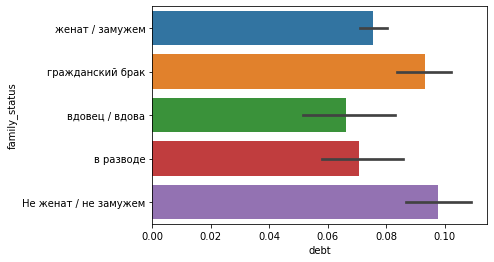

In [58]:
# график зависимости где по оси Х будут значения наличия задолженности, 
# а по оси Y будет семейный статус 

sns.barplot(x=data['debt'], y=data['family_status']);

Из графика видно, что больше всего задолженности по возвратам кредита в срок у тех кто не женат/не замужем и состоит в гражданском браке. Меньше всего задолженностей у овдовевших и кто находится в разводе. Далее выведем процент возврата кредита в срок в зависимости от семейного положения. Для чего воспользуемся ранее созданной функцией debt.

In [59]:
# создадим список с уникальными категориями,
# его будем использовать для удобства при выводе данных

category = data['family_status'].unique()

In [60]:
# теперь воспользуемся ранее созданной функцией debt
# в качестве первого параметра в функцию debt передадим столбец family_status
# в качестве второго параметра - категории граждан по семейному положению (из списка category)

for i in range(len(category)):
    print(f"Процент возврата кредита в срок для категории '{category[i]}': {debt('family_status', category[i])}")

Процент возврата кредита в срок для категории 'женат / замужем': 91.82%
Процент возврата кредита в срок для категории 'гражданский брак': 89.73%
Процент возврата кредита в срок для категории 'вдовец / вдова': 92.91%
Процент возврата кредита в срок для категории 'в разводе': 92.40%
Процент возврата кредита в срок для категории 'Не женат / не замужем': 89.18%


Создадим сводную таблицу, в которой сгруппируем данные по категориям людей и выведем общее количество кредитов, количество просрочек и долю просрочек. Решение будет аналогичным предыдущему расчету, где мы вывели данные значения в зависимости от количества детей. 

In [63]:
# в качестве 'index' передадим столбец 'family_status' - по нему будет идти группировка данных
# в качестве 'values' передаем столбец 'debt' - по нему будут идти подсчеты данных
# в 'aggfunc' передаем функции:
    # 'count' - для подсчета общего кол-ва взятых кредитов
    # собственную функцию debt_free_qnt для вывода количества кредитов, выплаченных в срок
    # 'sum' - для подсчета кредитов с просрочкой
    # собственную функцию percentage, для вывода доли возврата кредита с задержкой
    
data_pivot_by_family_status = pd.pivot_table( \
        data, index='family_status', values=['debt'], aggfunc=['count', debt_free_qnt, 'sum', percentage])
data_pivot_by_family_status

,count,debt_free_qnt,sum,percentage
,debt,debt,debt,debt
family_status,,,,
Не женат / не замужем,2796,2523,273,9.76%
в разводе,1189,1105,84,7.06%
вдовец / вдова,951,888,63,6.62%
гражданский брак,4133,3748,385,9.32%
женат / замужем,12261,11334,927,7.56%


Исходя из полученной сводной таблицы можно сделать следующие выводы. Меньше всех кредитов взяли овдовевшие и разведеные категории людей. Поэтому исключим из анализа эти категории. Итак, больше всех берут кредиты в категории "женат / замужем". Доля просрочек в этой категории минимальна. Осталось две категории: "гражданский брак" и "Не женат / не замужем". Доля возврата кредита в срок для этих категорий практически одинаковая. 

**Вывод:** 

Проанализировав исходные данные, пришли к следующим выводам. Зависимость между семейным положением и возвратом кредита в срок действительно существует. Чаще всего в срок возвращают женатые/замужние. Это весьма логично, т.к. эта категория людей скорее всего должна более ответственно подходить к таким вопросам, да и есть вероятность того, что оба члена семьи работают и с выплатами проще, чем тем кто не женат/не замужем. Категории "гражданский брак" и "Не женат / не замужем" выплачивают вовремя реже. Для данных групп доля выплат с задержкой практически одинаковая.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Ранее мы добавили в датафрейм столбец total_income_category, в котором мы разбили людей по категориям - A, B, C, D, E - в зависимости от их дохода. Используем эту группировку в расчете.

In [65]:
# подсчитаем количество возвратов и невозвратов кредита в срок в зависимости от уровня дохода
# сгруппируем данные по столбцу total_income_category и подсчитаем количество возвратов и невозвратов кредита в срок 
# по столбцу debt, применив метод value_counts()

data.groupby('total_income_category')['debt'].value_counts()

total_income_category  debt
A                      0          23
                       1           2
B                      0        4659
                       1         354
C                      0       14568
                       1        1353
D                      0         328
                       1          21
E                      0          20
                       1           2
Name: debt, dtype: int64

Видно, что у всех категорий были задолженности. Для наглядного представления ниже построим график зависимости.

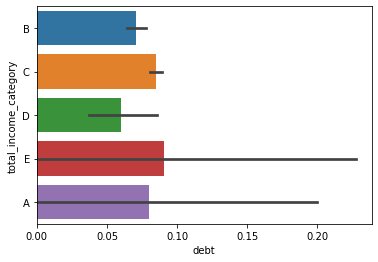

In [68]:
# построим график зависимости где по оси Х будут значения наличия задолженности,
# а по оси Y будет категория людей по их доходу 

sns.barplot(x=data['debt'], y=data['total_income_category']);

Из графика видно, что больше всего задолженностей было у граждан в категории Е, т.е. с доходом от 0 до 30 000. Меньше всего задолженностей было в категории D, т.е. с доходом от 30 001 до 50 000. Распределение в целом примерно одинаковое. Далее подсчитаем процент вовзрата кредита в срок по каждой категории. Для этого задействуем функцию `debt`.

In [69]:
# создадим список с уникальными категориями:

category_income = sorted(data.total_income_category.unique()) # отсортируем категории в порядке возрастания
category_income

['A', 'B', 'C', 'D', 'E']

In [70]:
# воспользуемся ранее созданной функцией debt
# в качестве первого параметра в функцию debt передадим столбец total_income_category
# в качестве второго параметра - категории людей - A, B, C, D, E

for i in range(len(category_income)):
    print(f"Процент возврата кредита в срок для категории \
    '{category_income[i]}': {debt('total_income_category', category_income[i])}")

Процент возврата кредита в срок для категории     'A': 91.30%
Процент возврата кредита в срок для категории     'B': 92.40%
Процент возврата кредита в срок для категории     'C': 90.71%
Процент возврата кредита в срок для категории     'D': 93.60%
Процент возврата кредита в срок для категории     'E': 90.00%


Меньше всего задолженностей по возврату в категории D - с доходом от 30 001 до 50 000. Больше всего задолженностей в категории E - с доходом от 0 до 30 000. В целом явно-выраженной зависимости возврата кредита в срок от уровня дохода нет. Распределение примерно одинаковое для всех групп граждан.

Создадим сводную таблицу, в которой сгруппируем данные по доходу людей и выведем общее количество кредитов, количество просрочек и долю просрочек. Решение будет аналогичным предыдущему расчету.

In [71]:
# в качестве 'index' передадим столбец 'total_income_category' - по нему будет идти группировка данных
# в качестве 'values' передаем столбец 'debt' - по нему будут идти подсчеты данных
# в 'aggfunc' передаем функции:
    # 'count' - для подсчета общего кол-ва взятых кредитов
    # собственную функцию debt_free_qnt для вывода количества кредитов, выплаченных в срок
    # 'sum' - для подсчета кредитов с просрочкой
    # собственную функцию percentage, для вывода доли возврата кредита с задержкой
    
data_pivot_by_total_income = pd.pivot_table(data, index='total_income_category', values=['debt'], aggfunc=['count', debt_free_qnt, 'sum', percentage])
data_pivot_by_total_income

,count,debt_free_qnt,sum,percentage
,debt,debt,debt,debt
total_income_category,,,,
A,25,23,2,8.0%
B,5013,4659,354,7.06%
C,15921,14568,1353,8.5%
D,349,328,21,6.02%
E,22,20,2,9.09%


Получив таблицу, сможем сделать следующие выводы. Категории А, D и Е придется исключить из анализа, в связи с недостаточным количеством клиентов. Отсутствие достаточного количества клиентов в этих категориях можно понять - или слишком маленький доход, или слишком большой. У кого слишком низкий доход кредит обычно не берут, т.к. отдавать будет нечем. У кого доход более миллиона рублей скорее всего кредит возьмут как юридическое лицо, а в данный список вероятнее всего входят физические лица. Для анализа остались две группы - В (с доходом от 200001 до 1000000) и С (с доходом от 50001 до 200000). Категория В возвращала кредиты вовремя чаще, чем категория С. Это напрямую связано от уровня дохода - в этой группе доход выше. Соответственно категория С возвращала кредиты вовремя реже.  

**Вывод:**

В данном исследовании смогли проанализировать только две категории людей - В (с доходом от 200001 до 1000000) и С (с доходом от 50001 до 200000). Остальные категории пришлось из анализа исключить в связи с недостаточным количеством кредитов по ним. В ходе анализа обнаружили прямую зависимость возврата кредита в срок от уровня дохода - клиенты с бОльшим уровнем дохода реже допускают просрочки по кредитам. 

### Как разные цели кредита влияют на его возврат в срок?

In [72]:
# подсчитаем количество возвратов и невозвратов кредита в срок в зависимости от цели кредита
# сгруппируем данные по столбцу purpose_category и подсчитаем количество возвратов и невозвратов кредита в срок 
# по столбцу debt, применив метод value_counts()

data.groupby('purpose_category')['debt'].value_counts()

purpose_category          debt
операции с автомобилем    0       3879
                          1        400
операции с недвижимостью  0       9970
                          1        780
получение образования     0       3619
                          1        369
проведение свадьбы        0       2130
                          1        183
Name: debt, dtype: int64

Везде были задержки при возврате кредита в срок. Визуализируем данные:

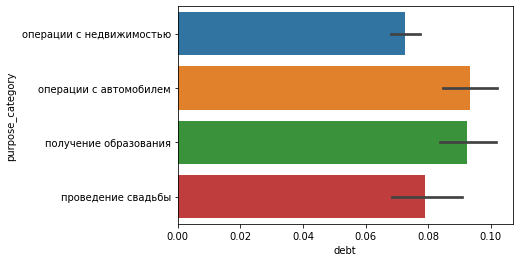

In [75]:
# построим график зависимости где по оси Х будут значения наличия задолженности,
# а по оси Y будут перечислены цели кредита

sns.barplot(x=data['debt'], y=data['purpose_category']);

Из графика видно, что меньше всего задолженностей при возврате было при кредитах, взятых для операций с недвижимостью и для проведения свадеб. Больше всего задержек при возврате было при кредитах под операции с автомобилем и при кредитах, взятых для получения образования.

Для более точного понимания воспользуемся ранее созданной функцией debt и выведем результаты в процентах. Сперва создадим дополнительный список с целями кредита, он нам потребуется для вывода данных.

In [76]:
# список с целями кредита для удобства выдачи информации:

purpose_debt = data.purpose_category.unique()
purpose_debt

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

In [78]:
# воспользуемся ранее созданной функцией debt
# в качестве первого параметра в функцию debt передадим столбец purpose_category
# в качестве второго параметра - цели кредита

for i in range(len(purpose_debt)):
    print(f"Если кредит был взят на '{purpose_debt[i]}', \
        то процент возврата кредита в срок: {debt('purpose_category', purpose_debt[i])}")
    
    

Если кредит был взят на 'операции с недвижимостью',         то процент возврата кредита в срок: 92.18%
Если кредит был взят на 'операции с автомобилем',         то процент возврата кредита в срок: 89.69%
Если кредит был взят на 'получение образования',         то процент возврата кредита в срок: 89.80%
Если кредит был взят на 'проведение свадьбы',         то процент возврата кредита в срок: 91.41%


Создадим сводную таблицу, в которой сгруппируем данные по цели кредита и выведем общее количество кредитов, количество просрочек и долю просрочек. Решение будет аналогичным предыдущему расчету.

In [79]:
# в качестве 'index' передадим столбец 'purpose_category' - по нему будет идти группировка данных
# в качестве 'values' передаем столбец 'debt' - по нему будут идти подсчеты данных
# в 'aggfunc' передаем функции:
    # 'count' - для подсчета общего кол-ва взятых кредитов
    # собственную функцию debt_free_qnt для вывода количества кредитов, выплаченных в срок
    # 'sum' - для подсчета кредитов с просрочкой
    # собственную функцию percentage, для вывода доли возврата кредита с задержкой
    
data_pivot_by_purpose = pd.pivot_table(data, index='purpose_category', values=['debt'], aggfunc=['count', debt_free_qnt, 'sum', percentage])
data_pivot_by_purpose

,count,debt_free_qnt,sum,percentage
,debt,debt,debt,debt
purpose_category,,,,
операции с автомобилем,4279,3879,400,9.35%
операции с недвижимостью,10750,9970,780,7.26%
получение образования,3988,3619,369,9.25%
проведение свадьбы,2313,2130,183,7.91%


В данной таблице видно, что для анализа хватает данных по всем категориям. Далее распишем возврат кредита по категориям, начиная от наименьшего количества просрочек и заканчивая самыми большими просрочками по платежам. Меньше всего задержек по выплатам связаны с операциями с недвижимостью. Это весьма логично, т.к. суммы кредита большие, соответственно и штрафы за просрочки большие, поэтому все стораются платить вовремя. На проведение свадьбы доля просрочек немного больше. И больше всего просрочек по кредитам, взятым на получение образования и операции с автомобилем.

**Вывод:** 

Цель кредита влияет на его возврат в срок. Самые дорогие кредиты - это операции с недвижимостью - чаще возвращают вовремя. 

### Возможные причины появления пропусков в исходных данных

Пропуски в исходных данных могут быть вызваны несколькими причинами. Например, человеческий фактор - человек, заполняющий данные, мог отвлечься и случайно не заполнить тот или иной столбец. Также пропуски могут быть вызваны техническими сбоями или ошибками, например, при обновлении базы данных или неправильной выгрузке данных. В анализируемых данных было много пропусков в столбцах days_employed (общий трудовой стаж в днях) и в столбце total_income (ежемесячный доход). Причем количество пропусков в данных столбцах одинаковое - 2174. Это неслучайные пропуски. Возможно кто-то из этих людей работает в этом банке и как-то по особому идут расчеты. Возможно даже умышленно данные скрыты или не предоставлены клиентами. Также это может касаться пенсионеров. 

### Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных

В нашем анализе отсутствовали данные с ежемесячным доходом. Это количественные переменные. Заполнить такие пропуски можно было средним арифметическим значением или медианным. Средним арифметическим значением в нашем случае заполнять было бы не верно, т.к. на ежемесячный доход влияет тип занятости человека. Поэтому заполнять нужно медианным доходом среди всех записей с таким же типом занятости.

Также медиана не исказит статистики выборки в случае наличия выбросов, т.к. она к ним менее чувствительна.


## Общий вывод

[Назад к содержанию](#Содержание)

В настоящей работе провели анализ полученных данных от кредитного банка. Анализировали зависимость возврата кредита в срок от нескольких факторов: количества детей, семейного статуса, уровня дохода и цели кредита. Для наглядного представления зависимости построили графики по всем параметрам. Для количественного понимания вывели сводные таблицы с общим количеством взятых кредитов, с количеством кредитов, выплаченных вовремя и с просрочкой, а также долю просрочки в процентах, сгруппированные по требуемым категориям. 

**Выводы следующие:** 

   1) Зависимость между количеством детей и возвратом кредита в срок существует. Бездетные выплачивает кредит в срок чаще, чем те у кого один или два ребенка. У кого трое, четверо и пятеро детей из анализа пришлось исключить из-за недостаточного количества взятых кредитов.
   
   2) Зависимость между семейным положением и возвратом кредита в срок существует. Чаще всего в срок возвращают женатые/замужние. Категории "гражданский брак" и "Не женат / не замужем" выплачивают вовремя реже. Для данных групп доля выплат с задержкой практически одинаковая. Исключили из анализа группы овдовевших и разведеных людей из-за недостаточного количества взятых кредитов.
   
   3) Зависимость возврата кредита в срок от уровня дохода существует - чем доход выше, тем количество возвратов кредита в срок больше. Без анализа сходу не смогли ответить на этот вопрос, т.к. в исходных данных были пропуски, которые мы заполнили медианным способом.
   
   4) Цель кредита также влияет на его возврат в срок. Кредиты, взятые на операции с недвижимостью возвращают в срок чаще остальных.